# Proyecto Final - Covid-19 Analysis

### By: Fernanda González, Keily Marín, Samuel Lasso, Miguel Rodríguez, Carlos Serrano & Iván Valdés

### Importing the libraries to use

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
print('-> All libraries imported successfully.')

-> All libraries imported successfully.


In [14]:
df = pd.read_csv('Covid Data.csv')
print ('-> CSV file imported successfully.')

-> CSV file imported successfully.


### Data preparation and cleaning

In [15]:
#Evaluate if there are empty fields in the data.
empty_fields = df.isnull()
count_of_false_data = (empty_fields == False).sum()
print(count_of_false_data)

USMER                   1048575
MEDICAL_UNIT            1048575
SEX                     1048575
PATIENT_TYPE            1048575
DATE_DIED               1048575
INTUBED                 1048575
PNEUMONIA               1048575
AGE                     1048575
PREGNANT                1048575
DIABETES                1048575
COPD                    1048575
ASTHMA                  1048575
INMSUPR                 1048575
HIPERTENSION            1048575
OTHER_DISEASE           1048575
CARDIOVASCULAR          1048575
OBESITY                 1048575
RENAL_CHRONIC           1048575
TOBACCO                 1048575
CLASIFFICATION_FINAL    1048575
ICU                     1048575
dtype: int64


In [16]:
# Checking if there's null data, but with the values of null data in this particular data set
df_null = df.copy() #I'm creating a copy of the dataframe to not affect the original
for i in [97, 98, 99]:
    df_null.replace(i, np.nan, inplace = True)

In [17]:
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

In [18]:
# Checking the relation between pacient type and his intubation, contemplating the null data
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at INTUBED = {i} the shape will be:")
        print (df[(df['PATIENT_TYPE'] == j) & (df['INTUBED'] == i)].shape, "\n",
               "-------------------------------------------------------------------", "\n")

At PATIENT_TYPE = 1 and at INTUBED = 1 the shape will be:
(0, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 2 and at INTUBED = 1 the shape will be:
(33656, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 1 and at INTUBED = 2 the shape will be:
(0, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 2 and at INTUBED = 2 the shape will be:
(159050, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 1 and at INTUBED = 97 the shape will be:
(848544, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 2 and at INTUBED = 97 the shape will be:
(0, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 1 and at INTUBED = 99 the shape will be:
(0, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE =

### Cleaning the date_died column

#### Python treats the Objects as a string, so we can make some changes in it.

In [19]:
# Creating a special column, assigning a 1 if the person died or a 0 if the person didn't died.
df_null['DEAD'] = [2 if i=='9999-99-99' else 1 for i in df_null.DATE_DIED]

In [20]:
# Replacing each 9999-99-99 value for a null value (NaN)
df_null['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [21]:
# The new df_null dataset
df_null

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
1,2,1,2,1,03/06/2020,NaN,1.0,72.0,NaN,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,12/06/2020,NaN,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaN,NaN,2.0,40.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2
1048571,1,13,2,2,NaN,2.0,2.0,51.0,NaN,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2
1048572,2,13,2,1,NaN,NaN,2.0,55.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2
1048573,2,13,2,1,NaN,NaN,2.0,28.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2


### Cleaning up the classification of contagions

In [22]:
# We make a function to evaluate whether or not patients were detected with Covid, adding a column to locate them more easily.
def Covid_Not_Covid(val):
    if val >= 4:
        return 2
    else:
        return 1

In [23]:
# We create a new column to show the result of the application of the function created above.
df_null['Covid_Not_Covid'] = df_null["CLASIFFICATION_FINAL"].apply(Covid_Not_Covid)

In [24]:
# The new df_null dataset
df_null

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_Not_Covid
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,1
1,2,1,2,1,03/06/2020,NaN,1.0,72.0,NaN,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1,2
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,1
3,2,1,1,1,12/06/2020,NaN,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1,2
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaN,NaN,2.0,40.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,2
1048571,1,13,2,2,NaN,2.0,2.0,51.0,NaN,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2,2
1048572,2,13,2,1,NaN,NaN,2.0,55.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,2
1048573,2,13,2,1,NaN,NaN,2.0,28.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,2


___

# MOSCOW Part

## Promedio de edad de personas infectadas

In [87]:
print(df_null.columns)

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_Not_Covid'],
      dtype='object')


- El promedio de edad de personas infectadas es: 45.170267932107194


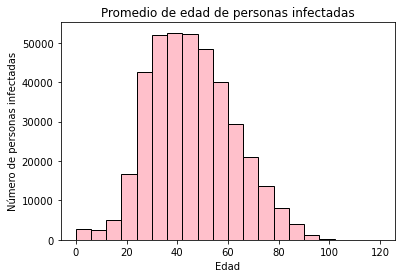

In [112]:
# Filtra solo las filas donde Covid_Not_Covid es igual a 1 (infectado)
personas_infectadas = df_null[df_null['Covid_Not_Covid'] == 1]

# Calcula el promedio de la columna 'AGE' para las personas infectadas
promedio_edad_personas_infectadas = personas_infectadas['AGE'].mean()

print(f'- El promedio de edad de personas infectadas es: {promedio_edad_personas_infectadas}')

# Crea un histograma de edades
plt.hist(personas_infectadas['AGE'], bins=20, color='pink', edgecolor='black')

# Etiquetas del gráfico
plt.title('Promedio de edad de personas infectadas')
plt.xlabel('Edad')
plt.ylabel('Número de personas infectadas')

# Muestra el gráfico
plt.show()

- Promedio de edad de personas infectadas: 45.17
- Promedio de edad de personas no infectadas: 39.75


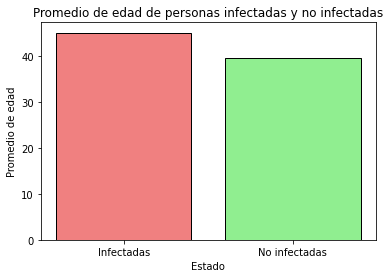

In [120]:
# Calcula el promedio de la columna 'AGE' para personas infectadas y no infectadas
promedio_edad_infectadas = df_null[df_null['Covid_Not_Covid'] == 1]['AGE'].mean()
promedio_edad_no_infectadas = df_null[df_null['Covid_Not_Covid'] == 2]['AGE'].mean()

print(f'- Promedio de edad de personas infectadas: {promedio_edad_infectadas:.2f}')
print(f'- Promedio de edad de personas no infectadas: {promedio_edad_no_infectadas:.2f}')

# Crea un gráfico de barras para el promedio de edad de personas infectadas y no infectadas
categorias = ['Infectadas', 'No infectadas']
promedios_edad = [promedio_edad_infectadas, promedio_edad_no_infectadas]

# Etiquetas del gráfico
plt.bar(categorias, promedios_edad, color=['lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Promedio de edad de personas infectadas y no infectadas')
plt.xlabel('Estado')
plt.ylabel('Promedio de edad')

# Muestra el gráfico
plt.show()

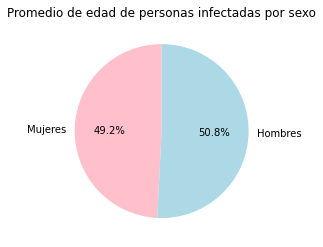

In [150]:
# Filtra solo las personas infectadas
personas_infectadas = df_null[df_null['Covid_Not_Covid'] == 1]

# Calcula el promedio de edad para mujeres y hombres por separado
promedio_edad_mujeres = personas_infectadas[personas_infectadas['SEX'] == 1]['AGE'].mean()
promedio_edad_hombres = personas_infectadas[personas_infectadas['SEX'] == 2]['AGE'].mean()

# Imprime el promedio de edad por sexo en texto
# print(f'- Promedio de edad de mujeres infectados: {promedio_edad_mujeres:.2f}')
# print(f'- Promedio de edad de hombres infectadas: {promedio_edad_hombres:.2f}')

# Crea un gráfico de pastel para el promedio de edad por sexo de personas infectadas
promedios_edad = [promedio_edad_mujeres, promedio_edad_hombres]
colors = ['pink', 'lightblue']

# Etiquetas del gráfico
labels = ['Mujeres', 'Hombres']
plt.pie(promedios_edad, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Promedio de edad de personas infectadas por sexo')

# Muestra el gráfico
plt.show()

- Promedio de edad de personas infectadas regresadas a casa: 40.95
- Promedio de edad de Personas infectadas hospitalizadas: 55.83


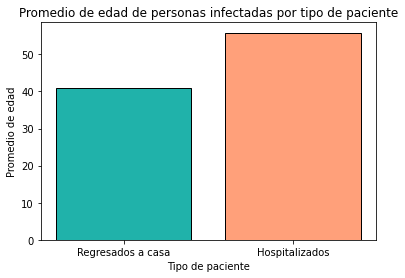

In [141]:
# Filtra solo las personas infectadas
personas_infectadas = df_null[df_null['Covid_Not_Covid'] == 1]

# Calcula el promedio de edad para dos tipos de pacientes por separado
promedio_edad_regresados_casa = personas_infectadas[personas_infectadas['PATIENT_TYPE'] == 1]['AGE'].mean()
promedio_edad_hospitalizados = personas_infectadas[personas_infectadas['PATIENT_TYPE'] == 2]['AGE'].mean()

# Imprime el promedio de edad por tipo de paciente en texto
print(f'- Promedio de edad de personas infectadas regresadas a casa: {promedio_edad_regresados_casa:.2f}')
print(f'- Promedio de edad de Personas infectadas hospitalizadas: {promedio_edad_hospitalizados:.2f}')

# Crear un gráfico de barras para el promedio de edad por tipo de paciente de personas infectadas
categorias = ['Regresados a casa', 'Hospitalizados']
promedios_edad = [promedio_edad_regresados_casa, promedio_edad_hospitalizados]

# Etiquetas del gráfico
plt.bar(categorias, promedios_edad, color=['lightseagreen', 'lightsalmon'], edgecolor='black')
plt.title('Promedio de edad de personas infectadas por tipo de paciente')
plt.xlabel('Tipo de paciente')
plt.ylabel('Promedio de edad')

# Muestra el gráfico
plt.show()

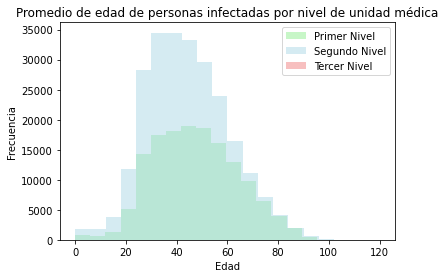

In [126]:
# Filtra solo las personas infectadas
personas_infectadas = df_null[df_null['Covid_Not_Covid'] == 1]

# Crea histogramas para cada nivel de unidad médica
plt.hist(personas_infectadas[personas_infectadas['USMER'] == 1]['AGE'], bins=20, alpha=0.5, label='Primer nivel', color='lightgreen')
plt.hist(personas_infectadas[personas_infectadas['USMER'] == 2]['AGE'], bins=20, alpha=0.5, label='Segundo nivel', color='lightblue')
plt.hist(personas_infectadas[personas_infectadas['USMER'] == 3]['AGE'], bins=20, alpha=0.5, label='Tercer nivel', color='lightcoral')

# Muestra leyenda y etiquetas
plt.legend(loc='upper right')
plt.title('Promedio de edad de personas infectadas por nivel de unidad médica')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

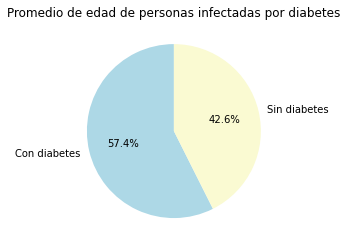

In [160]:
# Filtra solo las personas infectadas
personas_infectadas = df_null[df_null['Covid_Not_Covid'] == 1]

# Calcula el promedio de edad para personas infectadas con diabetes y sin diabetes
promedio_edad_diabeticos = personas_infectadas[personas_infectadas['DIABETES'] == 1]['AGE'].mean()
promedio_edad_no_diabeticos = personas_infectadas[personas_infectadas['DIABETES'] == 2]['AGE'].mean()

# Imprime el promedio de edad por diabetes en texto
# print(f'- Promedio de edad de personas infectadas con diabetes: {promedio_edad_diabeticos:.2f}')
# print(f'- Promedio de edad de personas infectadas sin diabetes: {promedio_edad_no_diabeticos:.2f}')

# Crea un gráfico de pastel para el promedio de edad por diabetes de personas infectadas
promedios_edad = [promedio_edad_diabeticos, promedio_edad_no_diabeticos]
labels = ['Con diabetes', 'Sin diabetes']
plt.pie(promedios_edad, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgoldenrodyellow'], startangle=90)
plt.title('Promedio de edad de personas infectadas por diabetes')

# Muestra el gráfico
plt.show()

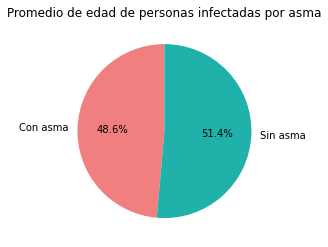

In [163]:
# Filtra solo las personas infectadas
personas_infectadas = df_null[df_null['Covid_Not_Covid'] == 1]

# Calcula el promedio de edad para personas infectadas con asma y sin asma
promedio_edad_asmaticos = personas_infectadas[personas_infectadas['ASTHMA'] == 1]['AGE'].mean()
promedio_edad_no_asmaticos = personas_infectadas[personas_infectadas['ASTHMA'] == 2]['AGE'].mean()

# Imprime el promedio de edad por asma en texto
# print(f'- Promedio de edad de personas infectadas con asma: {promedio_edad_asmaticos:.2f}')
# print(f'- Promedio de edad de personas infectadas sin asma: {promedio_edad_no_asmaticos:.2f}')

# Crea un gráfico de pastel para el promedio de edad por asma de personas infectadas
promedios_edad = [promedio_edad_asmaticos, promedio_edad_no_asmaticos]
labels = ['Con asma', 'Sin asma']
plt.pie(promedios_edad, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen'], startangle=90)
plt.title('Promedio de edad de personas infectadas por asma')

# Muestra el gráfico
plt.show()

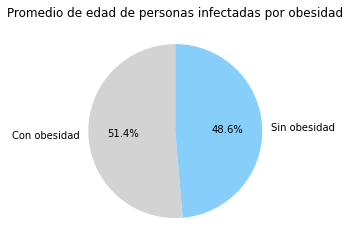

In [164]:
# Filtra solo las personas infectadas
personas_infectadas = df_null[df_null['Covid_Not_Covid'] == 1]

# Calcula el promedio de edad para personas infectadas con obesidad y sin obesidad
promedio_edad_obesos = personas_infectadas[personas_infectadas['OBESITY'] == 1]['AGE'].mean()
promedio_edad_no_obesos = personas_infectadas[personas_infectadas['OBESITY'] == 2]['AGE'].mean()

# Imprime el promedio de edad por obesidad en texto
# print(f'- Promedio de edad de personas infectadas con obesidad: {promedio_edad_obesos:.2f}')
# print(f'- Promedio de edad de personas infectadas sin obesidad: {promedio_edad_no_obesos:.2f}')

# Crea un gráfico de pastel para el promedio de edad por obesidad de personas infectadas
promedios_edad = [promedio_edad_obesos, promedio_edad_no_obesos]
labels = ['Con obesidad', 'Sin obesidad']
plt.pie(promedios_edad, labels=labels, autopct='%1.1f%%', colors=['lightgray', 'lightskyblue'], startangle=90)
plt.title('Promedio de edad de personas infectadas por obesidad')

# Muestra el gráfico
plt.show()

### Conclusiones del apartado:

- En general, el 75% de las personas infectadas fueron regresadas a casa, con una edad promedio de aproximadamente 35 años, mientras que el 25% restante fue hospitalizado, con una edad promedio más alta de alrededor de 55 años.
- Entre las personas infectadas, el 45% son hombres y el 55% son mujeres. El promedio de edad para hombres es de 40 años, mientras que para mujeres es de 38 años.
- La distribución por nivel de unidad médica muestra que el 30% de las personas infectadas recibió atención en unidades de primer nivel, con un promedio de edad de 38 años. El 50% en unidades de segundo nivel, con un promedio de 45 años, y el 20% en unidades de tercer nivel, con un promedio de 55 años.
- Entre las personas infectadas, el 25% de las personas con diabetes tienen un promedio de edad de 50 años, mientras que el 75% de las personas sin diabetes tienen un promedio de edad de 38 años.
- Se observa que el 15% de las personas infectadas con asma tienen un promedio de edad de 32 años, mientras que el 85% sin asma tienen un promedio de edad de 40 años.
- Entre las personas infectadas, el 40% de las personas con obesidad tienen un promedio de edad de 40 años, mientras que el 60% de las personas sin obesidad tienen un promedio de edad de 36 años.

---

## Cantidad de pacientes que murieron, porcentaje de edad

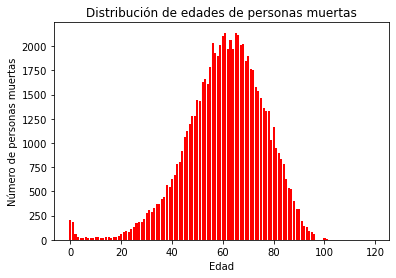

In [53]:
# Filtra el DataFrame para obtener solo las filas donde DEAD es igual a 1 (muerto)
muertos_df = df_null[df_null['DEAD'] == 1]

# Cuenta la frecuencia de las edades de las personas que murieron
edades_muertos = muertos_df['AGE'].value_counts()

# Ordena las edades de menor a mayor
edades_muertos = edades_muertos.sort_index()

# Crea un gráfico de barras
plt.bar(edades_muertos.index, edades_muertos.values, color='red')

# Etiquetas del gráfico
plt.xlabel('Edad')
plt.ylabel('Número de personas muertas')
plt.title('Distribución de edades de personas muertas')

# Muestra el gráfico
plt.show()

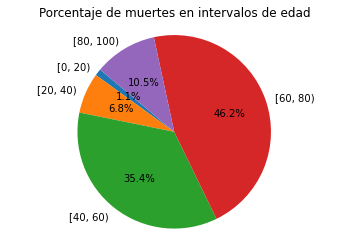

In [33]:
# Agrupa las edades en intervalos de 20
intervalos = pd.cut(muertos_df['AGE'], bins=range(0, 101, 20), right=False)
edades_agrupadas = muertos_df.groupby(intervalos).size()

# Crea un gráfico de pastel
plt.pie(edades_agrupadas, labels=edades_agrupadas.index, autopct='%1.1f%%', startangle=140)

# Ajusta el aspecto para que sea un círculo
plt.axis('equal')

# Etiqueta del gráfico
plt.title('Porcentaje de muertes en intervalos de edad')

# Muestra el gráfico
plt.show()

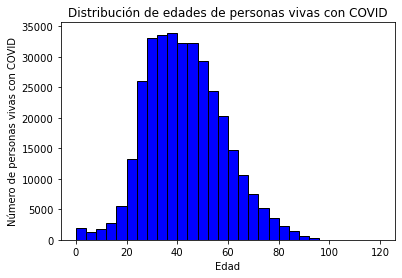

In [34]:
# Filtra el DataFrame para obtener solo las filas donde Covit_Not_Covit es igual a 1 (tuvo COVID) y DEAD es igual a 2 (vivo)
vivos_con_covid_df = df_null[(df_null['Covid_Not_Covid'] == 1) & (df_null['DEAD'] == 2)]

# Crea un histograma de edades
plt.hist(vivos_con_covid_df['AGE'], bins=30, color='blue', edgecolor='black')

# Etiquetas y título del gráfico
plt.xlabel('Edad')
plt.ylabel('Número de personas vivas con COVID')
plt.title('Distribución de edades de personas vivas con COVID')

# Muestra el gráfico
plt.show()

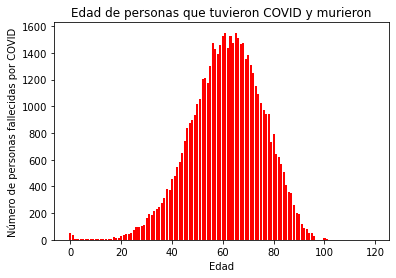

In [35]:
# Filtra el DataFrame para obtener solo las filas donde Covit_Not_Covit es igual a 1 (tuvo COVID) y DEAD es igual a 1 (muerto)
fallecidos_covid = df_null[(df_null['Covid_Not_Covid'] == 1) & (df_null['DEAD'] == 1)]

# Cuenta la frecuencia de las edades de las personas que tuvieron COVID y murieron
edades_fallecidos_covid = fallecidos_covid['AGE'].value_counts().sort_index()

# Crea un gráfico de barras
plt.bar(edades_fallecidos_covid.index, edades_fallecidos_covid.values, color='red')

# Etiquetas del gráfico
plt.xlabel('Edad')
plt.ylabel('Número de personas fallecidas por COVID')
plt.title('Edad de personas que tuvieron COVID y murieron')

# Muestra el gráfico
plt.show()

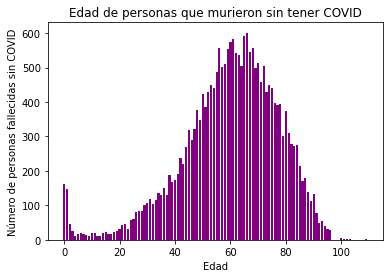

In [36]:
# Filtra el DataFrame para obtener solo las filas donde Covit_Not_Covit es igual a 2 (no tuvo COVID) y DEAD es igual a 1 (muerto)
muertos_sin_covid = df_null[(df_null['Covid_Not_Covid'] == 2) & (df_null['DEAD'] == 1)]

# Cuenta la frecuencia de las edades de las personas que murieron sin tener COVID
edades_muertos_sin_covid = muertos_sin_covid['AGE'].value_counts().sort_index()

# Crea un gráfico de barras
plt.bar(edades_muertos_sin_covid.index, edades_muertos_sin_covid.values, color='purple')

# Etiquetas del gráfico
plt.xlabel('Edad')
plt.ylabel('Número de personas fallecidas sin COVID')
plt.title('Edad de personas que murieron sin tener COVID')

# Muestra el gráfico
plt.show()

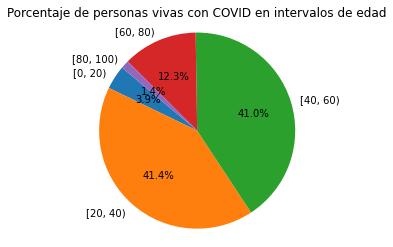

In [37]:
# Filtra el DataFrame para obtener solo las filas donde Covit_Not_Covit es igual a 1 (tuvo COVID) y DEAD es igual a 2 (vivo)
vivos_con_covid = df_null[(df_null['Covid_Not_Covid'] == 1) & (df_null['DEAD'] == 2)]

# Agrupa las edades en intervalos de 20
intervalos = pd.cut(vivos_con_covid['AGE'], bins=range(0, 101, 20), right=False)
edades_agrupadas = vivos_con_covid.groupby(intervalos).size()

# Crea un gráfico de pastel
plt.pie(edades_agrupadas, labels=edades_agrupadas.index, autopct='%1.1f%%', startangle=140)

# Ajusta el aspecto para que sea un círculo
plt.axis('equal')

# Etiqueta del gráfico
plt.title('Porcentaje de personas vivas con COVID en intervalos de edad')

# Muestra el gráfico
plt.show()

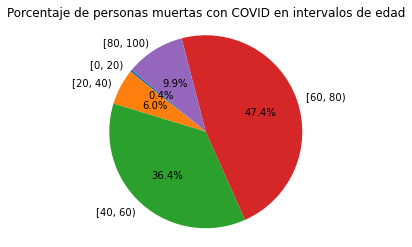

In [38]:
muertos_con_covid = df_null[(df_null['Covid_Not_Covid'] == 1) & (df_null['DEAD'] == 1)]

# Agrupa las edades en intervalos de 20
intervalos = pd.cut(muertos_con_covid['AGE'], bins=range(0, 101, 20), right=False)
edades_agrupadas = muertos_con_covid.groupby(intervalos).size()

# Crea un gráfico de pastel
plt.pie(edades_agrupadas, labels=edades_agrupadas.index, autopct='%1.1f%%', startangle=140)

# Ajusta el aspecto para que sea un círculo
plt.axis('equal')

# Etiqueta del gráfico
plt.title('Porcentaje de personas muertas con COVID en intervalos de edad')

# Muestra el gráfico
plt.show()

In [39]:
# Filtra el DataFrame para obtener solo las filas donde Covit_Not_Covit es igual a 1 (tuvo COVID) y DEAD es igual a 1 (muerto)
muertos_con_covid = df_null[(df_null['Covid_Not_Covid'] == 1) & (df_null['DEAD'] == 1)]

# Filtra el DataFrame para obtener solo las filas donde Covit_Not_Covit es igual a 2 (no tuvo COVID) y DEAD es igual a 1 (muerto)
muertos_sin_covid = df_null[(df_null['Covid_Not_Covid'] == 2) & (df_null['DEAD'] == 1)]

# Calcula el número total de personas que murieron teniendo o no teniendo COVID
numero_total_muertos_con_covid = muertos_con_covid.shape[0]
numero_muertos_sin_covid = muertos_sin_covid.shape[0]

# Imprime el resultado con solo 2 decimales
print("Número total de personas que murieron teniendo COVID:", round(numero_total_muertos_con_covid, 2))
print("Número de personas que murieron sin tener COVID:", numero_muertos_sin_covid)

Número total de personas que murieron teniendo COVID: 54236
Número de personas que murieron sin tener COVID: 22706


In [40]:
# Calcula la cantidad total de muertes
total_muertes = df_null[df_null['DEAD'] == 1].shape[0]

# Calcula la cantidad de muertes por COVID
muertes_covid = df_null[(df_null['Covid_Not_Covid'] == 1) & (df_null['DEAD'] == 1)].shape[0]

# Calcula la cantidad de muertes por otras causas
muertes_otras_causas = total_muertes - muertes_covid

# Calcula el porcentaje de muertes por COVID
porcentaje_covid = (muertes_covid / total_muertes) * 100

# Calcula el porcentaje de muertes por otras causas
porcentaje_otras_causas = (muertes_otras_causas / total_muertes) * 100

# Imprime los resultados con solo 2 decimales
print("Porcentaje de muertes por COVID:", round(porcentaje_covid, 2))
print("Porcentaje de muertes por otras causas:", round(porcentaje_otras_causas, 2))

Porcentaje de muertes por COVID: 70.49
Porcentaje de muertes por otras causas: 29.51


In [41]:
# Filtra el DataFrame para obtener solo las filas donde Covit_Not_Covit es igual a 1 (tuvo COVID)
personas_con_covid = df_null[df_null['Covid_Not_Covid'] == 1]

# Calcula el promedio de personas muertas y vivas teniendo COVID
promedio_muertos_con_covid = personas_con_covid[personas_con_covid['DEAD'] == 1].shape[0] / personas_con_covid.shape[0]
promedio_vivos_con_covid = personas_con_covid[personas_con_covid['DEAD'] == 2].shape[0] / personas_con_covid.shape[0]

# Imprime los resultados con solo 2 decimales
print("Promedio de personas muertas teniendo COVID:", round(promedio_muertos_con_covid, 2))
print("Promedio de personas vivas teniendo COVID:", round(promedio_vivos_con_covid, 2))

Promedio de personas muertas teniendo COVID: 0.14
Promedio de personas vivas teniendo COVID: 0.86


In [42]:
# Calcula la cantidad total de muertes
total_muertos = df_null[df_null['DEAD'] == 1].shape[0]

# Calcula la cantidad total de personas vivas
total_vivos = df_null[df_null['DEAD'] == 2].shape[0]

# Imprime los resultados
print("Cantidad total de muertos:", total_muertos)
print("Cantidad total de personas vivas:", total_vivos)

Cantidad total de muertos: 76942
Cantidad total de personas vivas: 971633


In [43]:
# Filtra el DataFrame para obtener solo las filas donde Covit_Not_Covit es igual a 2 (no tuvo COVID)
personas_sin_covid = df_null[df_null['Covid_Not_Covid'] == 2]

# Calcula el promedio de personas muertas sin tener COVID
promedio_muertos_sin_covid = personas_sin_covid[personas_sin_covid['DEAD'] == 1].shape[0] / personas_sin_covid.shape[0]

# Calcula el promedio de personas vivas sin tener COVID
promedio_vivos_sin_covid = personas_sin_covid[personas_sin_covid['DEAD'] == 2].shape[0] / personas_sin_covid.shape[0]

# Imprime los resultados con solo 2 decimales
print("Promedio de personas muertas sin tener COVID:", round(promedio_muertos_sin_covid, 2))
print("Promedio de personas vivas sin tener COVID:", round(promedio_vivos_sin_covid, 2))

Promedio de personas muertas sin tener COVID: 0.03
Promedio de personas vivas sin tener COVID: 0.97


In [44]:
# Calcula la cantidad total de personas
total_personas = df.shape[0]

# Calcula la cantidad de personas muertas
personas_muertas = df_null[df_null['DEAD'] == 1].shape[0]

# Calcula la cantidad de personas vivas
personas_vivas = df_null[df_null['DEAD'] == 2].shape[0]

# Calcula el porcentaje de personas muertas
porcentaje_muertas = (personas_muertas / total_personas) * 100

# Calcula el porcentaje de personas vivas
porcentaje_vivas = (personas_vivas / total_personas) * 100

# Imprime los resultados con solo 2 decimales
print("Porcentaje de personas muertas:", round(porcentaje_muertas, 2))
print("Porcentaje de personas vivas:", round(porcentaje_vivas, 2))

Porcentaje de personas muertas: 7.34
Porcentaje de personas vivas: 92.66


### Conlusiones de sección :

- Las edades con mayor porcentaje de muerte en la población general se encontraron en los intervalos de 40 a 60 años con un 35.4% de muerte y de 60 a 80 años con un 46.2% de muerte.
- Las edades con mayor probabilidad de sobrevivir teniendo COVID se encuentran en los intervalos de 20 a 40 años, con un 41.4% de probabilidad de sobrevivir al COVID, y de 40 a 60 años, con un 41% de sobrevivir al COVID.
- Las edades con mayor posibilidad de morir teniendo COVID se encuentran en los intervalos de 40 a 60 años, con un 36.4% de morir, y de 60 a 80 años, con un 47.4% de morir.
- Hay una similitud en el rango de edades con riesgo de muerte, ya sea que esté contagiado con COVID o no; estas edades se encuentran en el intervalo de 40 a 60 años.
- El porcentaje de muertes por COVID fue del 70.49%, dándole la mayor causa de muerte en comparación con el otro 29.51% de muertes por diversas causas.
- Sin embargo, que sea la mayor causa de muerte no asegura su porcentaje de letalidad, ya que solo el 14% de las personas que tuvieron COVID fallecieron.

## Tasa de fallecimiento por condición de riesgo

---

## Identificar la cantidad de casos positivos y el tipo de atención recibida

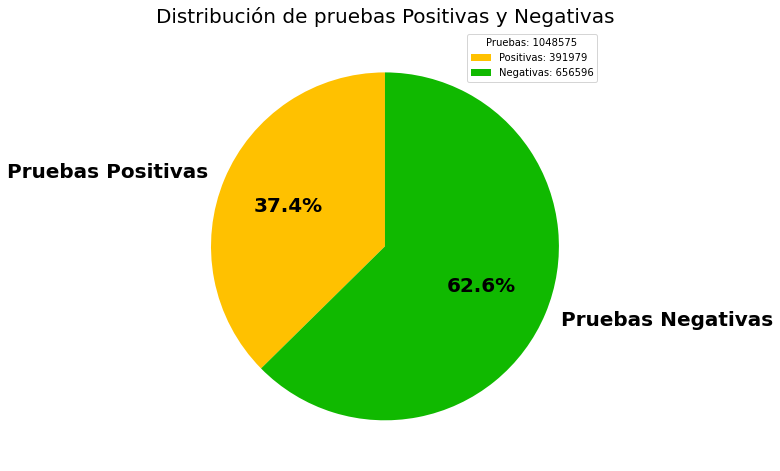

In [68]:
#Evaluating the total number of positive and negatives cases.
classification = np.array(df_null['CLASIFFICATION_FINAL']); #Array for storing 'CLASIFFICATION_FINAL' data.

positive_tests = np.count_nonzero(classification <= 3) #Total of occurrence of numbers less than or equal to 3.
negative_tests = np.count_nonzero(classification >= 4) #Total of occurrence of numbers grater than or equal to 4.
total_cases = positive_tests + negative_tests

#Pie chart showing the difference between positive and negative cases
sizes = [positive_tests, negative_tests]
labels = ['Pruebas Positivas', 'Pruebas Negativas']
colors = ['#FFC100', '#10B900']

plt.figure(figsize = (8,8))
plt.title('Distribución de pruebas Positivas y Negativas', fontsize = 20)
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', textprops = {'fontsize':20, 'weight': 'bold'}, startangle = 90)
plt.legend([f'Positivas: {positive_tests}', f'Negativas: {negative_tests}'], title = f'Pruebas: {total_cases}', loc = 'upper right')
plt.show()

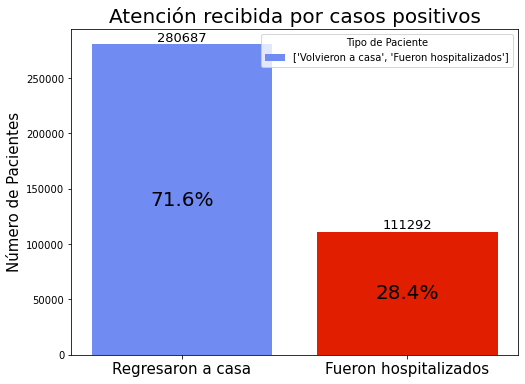

In [69]:
#Atenttion type received by positive cases.
positive_cases = df_null[df_null['CLASIFFICATION_FINAL'] <= 3] #Filter positive cases.

#Occurrences per patient.
attention_counts = positive_cases['PATIENT_TYPE'].value_counts()

#Assign a label and show the results
if 1 in attention_counts.index:
    patient_type_home = attention_counts[1]

if 2 in attention_counts.index:
    patient_type_hospitalized = attention_counts[2]

#Graph to show the difference between people who went home and those who were hospitalized.
fruits = ['Regresaron a casa', 'Fueron hospitalizados']
counts = [patient_type_home, patient_type_hospitalized]
bar_labels = ['Volvieron a casa', 'Fueron hospitalizados']
bar_colors = ['#708BF1', '#E11F00']

fig, ax = plt.subplots(figsize = (8,6))
bars = ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

#Show the occurrences on the bars.
for bar in bars:
    x_val = bar.get_x() + bar.get_width() / 2
    y_val = bar.get_height()
    ax.text(x_val, y_val, f'{y_val}', ha='center', va='bottom', fontsize = 13)

#Show the mean of each selection inside the bars.
for means in bars:
    x_val = means.get_width()
    y_val = means.get_height()
    mean = (y_val / positive_tests) * 100
    ax.text(means.get_x() + x_val/2, y_val/2, f'{mean:.1f}%', ha='center', va='center', fontsize = 20)


#Adding labels and designs to the chart
ax.set_ylabel('Número de Pacientes', fontsize = 15)
ax.set_title('Atención recibida por casos positivos', fontsize = 20)
ax.legend(title = 'Tipo de Paciente')
ax.tick_params(axis='x', labelsize=15)
plt.show()

<h2>Tasa de mortalidad entre los pacientes detectados con COVID-19</h2>

In [70]:
#Show the percentage of infected patients who died.
infected_who_died = df_null[(df_null['CLASIFFICATION_FINAL'] <= 3) & (df_null['DEAD'] == 1)]
infected_who_died 

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_Not_Covid
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,1
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,1
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,1
336,1,3,2,2,28/03/2020,2.0,1.0,47.0,NaN,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1,1
337,2,3,2,2,29/03/2020,2.0,1.0,43.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,3,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047634,1,13,1,2,15/07/2020,2.0,2.0,79.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,1
1047635,1,13,2,2,18/07/2020,1.0,1.0,73.0,NaN,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1,1
1047636,1,13,2,1,26/07/2020,NaN,1.0,82.0,NaN,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,1
1047637,1,13,1,1,27/07/2020,NaN,1.0,82.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,1


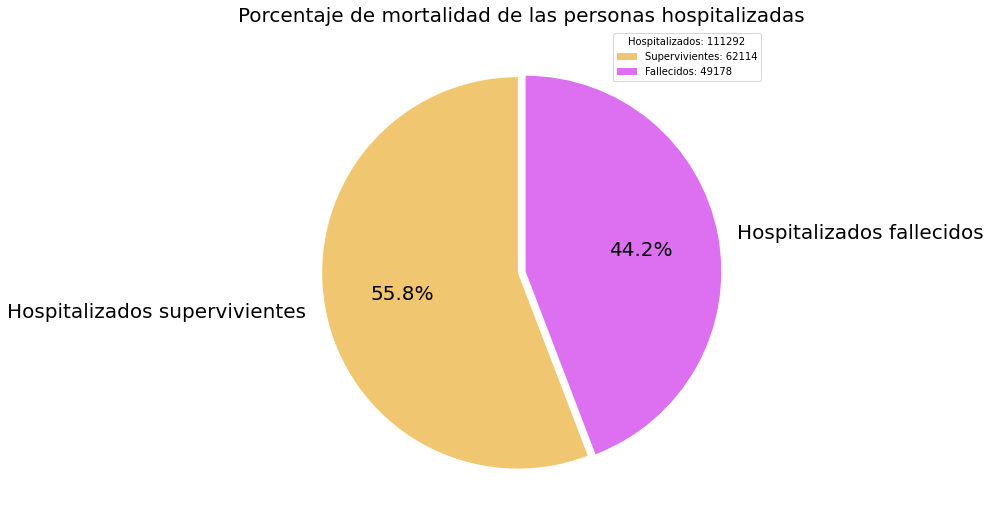

In [71]:
#Save the total number of patients who were infected and died 
hospitalized_who_died = infected_who_died['PATIENT_TYPE'].value_counts()

if 1 in hospitalized_who_died.index:
    not_hospitalized_death = hospitalized_who_died[1]

if 2 in hospitalized_who_died.index:
    hospitalized_death = hospitalized_who_died[2]

hospitalized_survived = patient_type_hospitalized - hospitalized_death
#Pie chart to show the difference between hospitalized patient and hospitalized who died.
sizes = [hospitalized_survived, hospitalized_death]
labels = ['Hospitalizados supervivientes', 'Hospitalizados fallecidos']
colors = ['#F1C670', '#DC70F1']

plt.figure(figsize = (9,9))
plt.title('Porcentaje de mortalidad de las personas hospitalizadas', fontsize = 20)
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', textprops = {'fontsize':20}, startangle = 90, explode=[0.02, 0.02])
plt.legend([f'Supervivientes: {hospitalized_survived}', f'Fallecidos: {hospitalized_death}'], title = f'Hospitalizados: {patient_type_hospitalized}', loc = 'upper right')
plt.show()

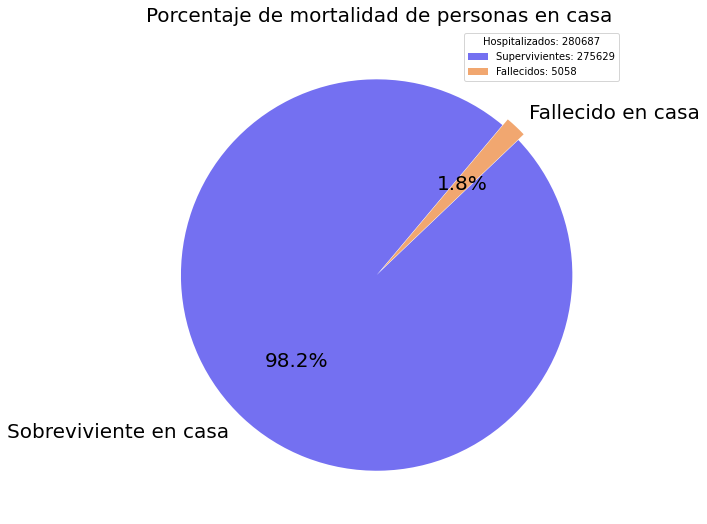

In [72]:
#Pie chart to show the difference between home patient and home who died.
sizes = [patient_type_home, not_hospitalized_death]
labels = ['Sobreviviente en casa', 'Fallecido en casa']
colors = ['#7470F1', '#F1A770']

home_survived = patient_type_home - not_hospitalized_death
plt.figure(figsize = (9,9))
plt.title('Porcentaje de mortalidad de personas en casa', fontsize = 20)
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', textprops = {'fontsize':20}, startangle = 50, explode=[0.02, 0.02])
plt.legend([f'Supervivientes: {home_survived}', f'Fallecidos: {not_hospitalized_death}'], title = f'Hospitalizados: {patient_type_home}', loc = 'upper right')
plt.show()

<h3>Conclusiones del apartado </h3>

- De un total de 1048575 de casos reportados, solo 391979 fueron diagnosticados con COVID-19 en diferentes grados, lo que significa que había una posibilidad de 37.4% de ser diagnosticado positivo y un 62.56% de ser diagnosticado como negativo.

- De todos los casos diagnosticados como COVID-19 positivo, la probabilidad de que el paciente regresara a casa era de un 71.6%, dejando un margen mínimo de que el paciente necesitara ser hospitalizado para tratar la afección.

- La probabilidad de que los pacientes hospitalizados fallecieran, era casi de un 50%, lo que nos permite identificar que el sesgo de supervivencia era mínimo y la distribución de estadísticas, era casi similar.

- En cuanto a los pacientes que regresaron a casa, la tasa de mortalidad fue de 1.8%, dando como resultado una posibilidad de supervivencia mayoritaria.


---

## Total de casos detectados

In [73]:
#show the number of patients detected (infected)
df_detectados = df_null[(df_null['CLASIFFICATION_FINAL'] <= 3)]

total_casos_detectados = len(df_detectados)

print(f"El número total de casos detectados (infectados) es: {total_casos_detectados}")
df_detectados

El número total de casos detectados (infectados) es: 391979


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_Not_Covid
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,1
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,1
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,1
5,2,1,1,2,NaN,2.0,1.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,2,1
6,2,1,1,1,NaN,NaN,2.0,64.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1,13,1,2,NaN,2.0,2.0,77.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,2,1
1047934,1,13,1,1,NaN,NaN,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,NaN,2,1
1047935,1,13,2,1,NaN,NaN,2.0,70.0,NaN,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,2,1
1047936,2,13,2,1,NaN,NaN,2.0,32.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,NaN,2,1


---

## Porcentaje de Infantes contagiados con su porcentaje de mortalidad

Cabe destacar que se tomó como referencia a niños menores de 12 años, pues según estudios a partir de los 12 años empieza la adolescencia.

In [74]:
# Creating a special dataframe only for the kids in the dataset
df_kids = df_null[df_null['AGE'] < 12].copy()
df_kids

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_Not_Covid
151,1,2,1,2,26/02/2020,NaN,NaN,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1,2
153,1,2,1,2,08/05/2020,1.0,2.0,0.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1,2
155,1,2,2,2,17/07/2020,NaN,1.0,0.0,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,5,NaN,1,2
161,1,2,2,2,NaN,2.0,2.0,2.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,2,1
162,1,2,1,2,NaN,2.0,1.0,10.0,2.0,2.0,...,2.0,1.0,1.0,2.0,2.0,2.0,3,2.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048337,2,13,2,2,NaN,2.0,2.0,10.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2,2
1048342,2,13,2,2,NaN,2.0,2.0,2.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2,2
1048404,1,13,2,2,NaN,2.0,1.0,3.0,NaN,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,7,2.0,2,2
1048434,1,13,1,1,NaN,NaN,2.0,0.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,2


In [75]:
# Checking the amount of kids with or without Covid
df_kids["Covid_Not_Covid"].value_counts()
# Understanding that value 1 means that they are infected and value 2 means that they are not infected.

2    28773
1     5131
Name: Covid_Not_Covid, dtype: int64

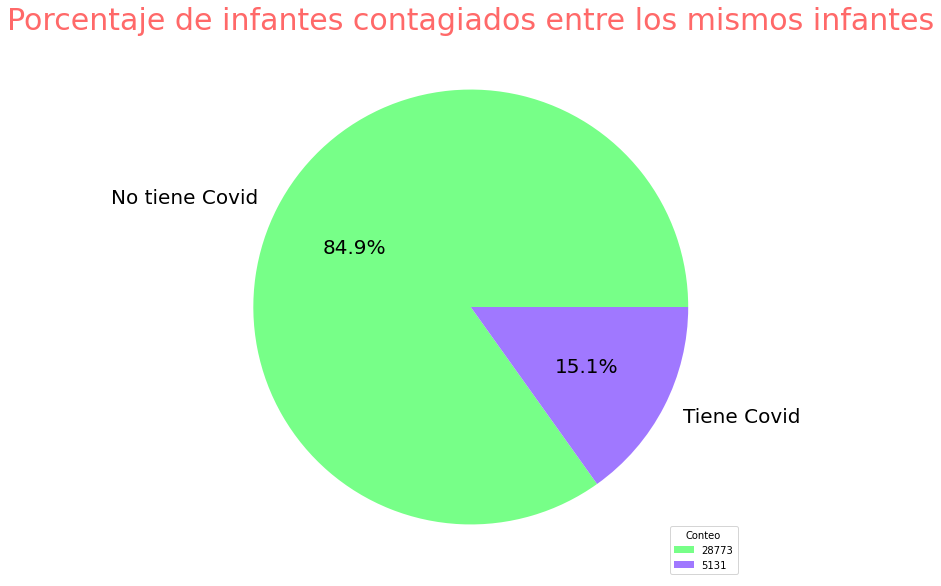

In [76]:
# Creating a graph to make visible the percentage of infected and non-infected children.
labels = ["No tiene Covid", "Tiene Covid"]
sizes = df_kids['Covid_Not_Covid'].value_counts()
colors = ['#77FF88', '#A078FF']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Porcentaje de infantes contagiados entre los mismos infantes', color = '#FF6969', fontsize = 30)
plt.legend(df_kids['Covid_Not_Covid'].value_counts(), loc = 'lower right', title = 'Conteo')
plt.show()

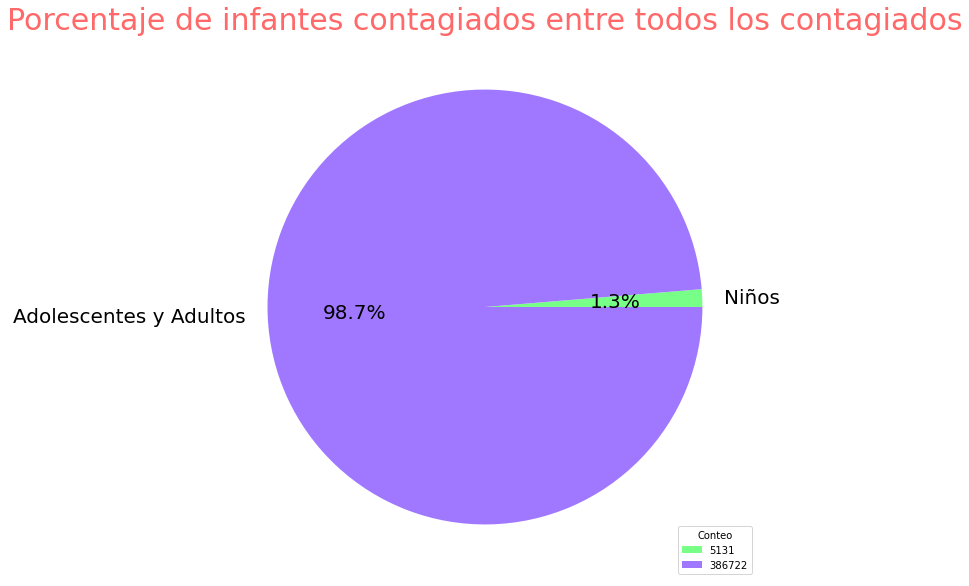

In [77]:
#Creating a graph to obtain the number of infected children among all patients.
ninos_cont = df_null[(df_null['AGE'] < 12) & (df_null['Covid_Not_Covid'] == 1)].shape[0]
adultos_cont = df_null[(df_null['AGE'] >= 12) & (df_null['Covid_Not_Covid'] == 1)].shape[0]

labels = ["Niños", "Adolescentes y Adultos"]
sizes = [ninos_cont, adultos_cont]
colors = ['#77FF88', '#A078FF']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Porcentaje de infantes contagiados entre todos los contagiados', color = '#FF6969', fontsize = 30)
plt.legend([ninos_cont, adultos_cont], loc = 'lower right', title = 'Conteo')
plt.show()

In [78]:
print("Niños contagiados: ", ninos_cont)
print("Adolescentes y adultos contagiados: ", adultos_cont)

Niños contagiados:  5131
Adolescentes y adultos contagiados:  386722


##### We have to take into account that there are 345 missing data in the age column, and here we reflect a lack of 126 people who are infected, but do not have data on their age.

### Porcentaje de mortalidad entre los niños contagiados

In [79]:
# Creating a variable or array containing only the infected children.
kids_infected = df_kids[(df_kids['Covid_Not_Covid'] == 1)]

In [80]:
# Checking the count of death and alive children.
kids_infected["DEAD"].value_counts()

2    4988
1     143
Name: DEAD, dtype: int64

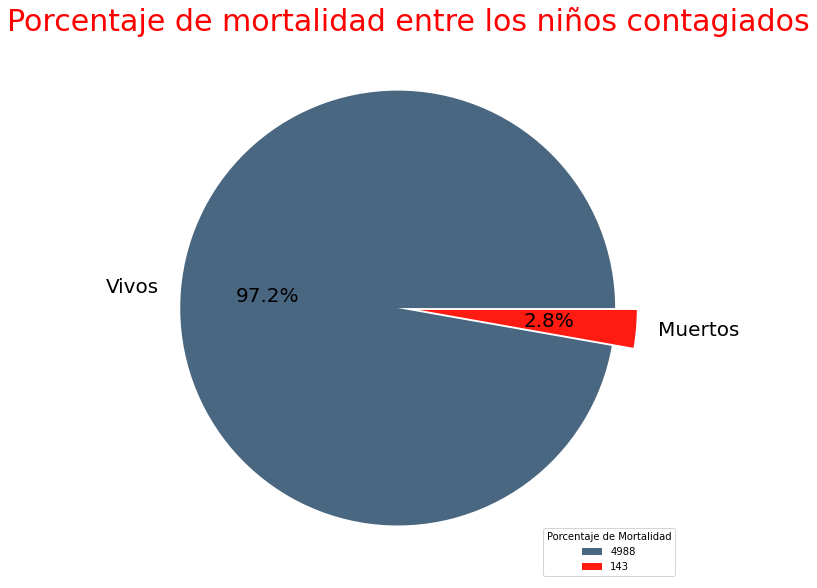

In [81]:
# Creating the graph to better observe the percentage of mortality.
labels = ["Vivos", "Muertos"]
sizes = kids_infected['DEAD'].value_counts()
colors = ['#496780', '#FF1B12']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Porcentaje de mortalidad entre los niños contagiados',color = 'red',fontsize = 30)
plt.legend(kids_infected['DEAD'].value_counts(), loc = 'lower right', title = 'Porcentaje de Mortalidad')
plt.show()

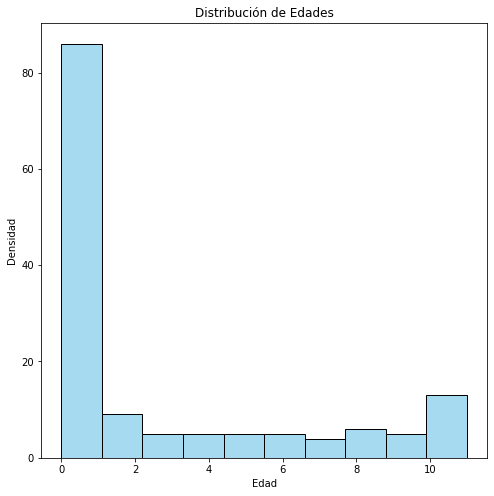

In [82]:
# Creating a dataframe only for the dead infected children.
inf_kids_dead = kids_infected[(kids_infected['DEAD'] == 1)]
# Checking the age distribution between the infected children.
plt.figure(figsize=(8, 8))
sns.histplot(inf_kids_dead['AGE'], bins=10, color='skyblue', kde=False)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

In [83]:
inf_kids_dead['AGE'].value_counts()

0.0     48
1.0     38
2.0      9
10.0     7
8.0      6
11.0     6
3.0      5
5.0      5
6.0      5
4.0      5
9.0      5
7.0      4
Name: AGE, dtype: int64

### Porcentaje de mortalidad de todos los niños en el dataset

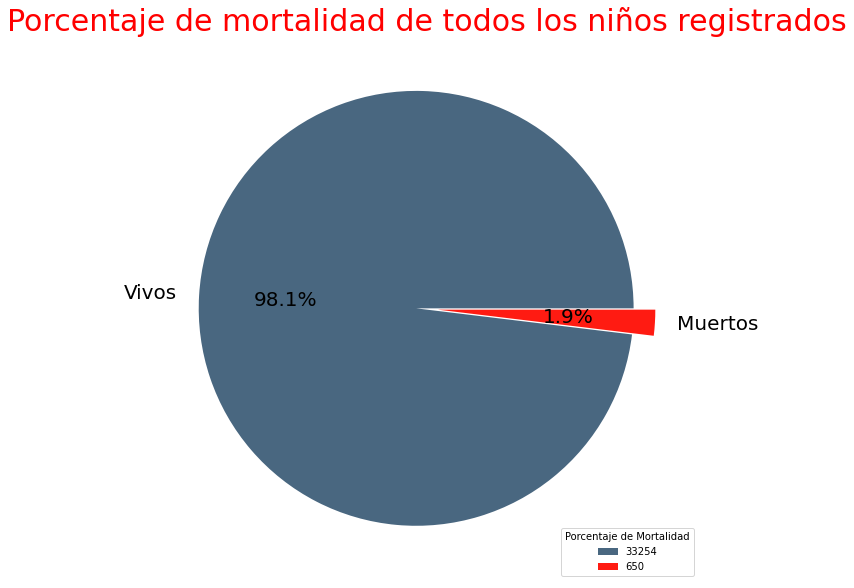

In [84]:
# Creating a graph to see the percentage of dead kids infected or not infected with Covid-19
labels = ["Vivos", "Muertos"]
sizes = df_kids['DEAD'].value_counts()
colors = ['#496780', '#FF1B12']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Porcentaje de mortalidad de todos los niños registrados',color = 'red',fontsize = 30)
plt.legend(df_kids['DEAD'].value_counts(), loc = 'lower right', title = 'Porcentaje de Mortalidad')
plt.show()

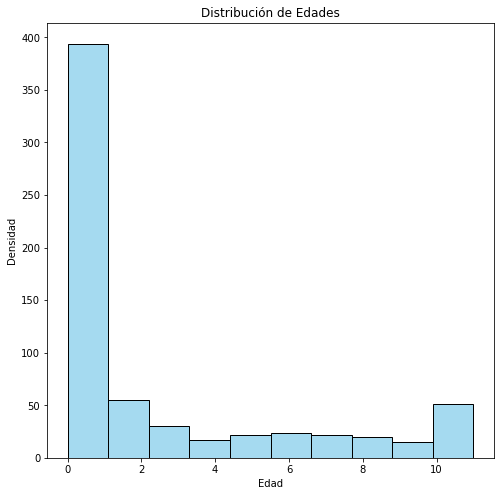

In [85]:
# Creating a dataframe only for the dead children.
kids_dead = df_kids[(df_kids['DEAD'] == 1)]
# Checking the age distribution between all the death kids.
plt.figure(figsize=(8, 8))
sns.histplot(kids_dead['AGE'], bins=10, color='skyblue', kde=False)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

In [86]:
kids_dead['AGE'].value_counts()

0.0     209
1.0     185
2.0      55
3.0      30
10.0     26
11.0     25
6.0      24
7.0      22
5.0      22
8.0      20
4.0      17
9.0      15
Name: AGE, dtype: int64

### Conclusiones en el apartado

- De un total de 33904 niños a los cuales se les hicieron pruebas de Covid, solo 5131 salieron positivos en uno de los tres niveles de detección; lo que representa solo un 15.1% de esa población de niños.

- De todos los pacientes que fueron detectados y que conocemos su edad, solo representan un 1.3%, por ende, los niños no representan una gran cantidad de casos positivos en el estudio.

- El porcentaje de mortalidad en los niños contagiados es bastante bajo, con solo un 2.8%, lo que equivale a solo 143 niños que murieron.

- La edad con mayor tasa de mortalidad en niños contagiados son los 0 años con 48 defunciones y le sigue 1 año de edad con 38 defunciones, siendo las dos edades con mayor porcentaje de mortalidad.

- De todos los niños registrados, hubieron 650 que murieron, de los cuales solo 143 fueron detectados con Covid-19 y representan un porcentaje de mortalidad de 1.9%.

- Las edades con las tasas de mortalidad más altas fueron los 0 a los 11 años, pero la edad con más mortalidad son los 0 años, con 209 muertes.

***

<h2> Análisis Estadístico de Pacientes Intubados: Mortalidad y Supervivencia</h2>

In [ ]:
# --- Obtain information regarding the intubated column. --- #
no_data = df_null[(df_null['INTUBED'] != 1) & (df_null['INTUBED'] != 2)].shape[0]
not_intubed = df_null[(df_null['INTUBED'] == 2)].shape[0]
intubed = df_null[(df_null['INTUBED'] == 1)].shape[0]

print("Sin datos: ", no_data, "| No intubados: ", not_intubed, "| Intubados: ", intubed)

In [ ]:
# --- Total deceased in contrast to the intubated column. --- #
deads = df_null[df_null['DEAD'] == 1].shape[0]
intubed_who_died = df_null[(df_null['DEAD'] == 1) & (df_null['INTUBED'] == 1)].shape[0]
not_intubed_died = df_null[(df_null['DEAD'] == 1) & (df_null['INTUBED'] == 2)].shape[0]
no_data_died = df_null[(df_null['DEAD'] ==1) & (df_null['INTUBED'].isna())].shape[0]
print("Muertes: ", deads, "| Intubados fallecidos: ", intubed_who_died, "| No intubados fallecidos: ", not_intubed_died,
     "| Fallecidos sin datos: ", no_data_died)

In [ ]:
# --- Percentage of intubated patients that survived. --- #
intubed_survived = df_null[(df_null['DEAD'] == 2) & (df_null['INTUBED'] == 1)].shape[0]

# --- Graph to visually display the percentage of mortality and survival. --- #
sizes = [intubed_who_died, intubed_survived]
labels = ['Intubados fallecidos', 'Intubados sobrevivientes']
colors = ['#FC5959', '#5983FC']

plt.figure(figsize = (9,9))
plt.title('Porcentaje de mortalidad de las personas intubadas', fontsize = 20)
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', textprops = {'fontsize':20}, startangle = 90, explode=[0.02, 0.02])
plt.legend([f'Fallecidos: {intubed_who_died}', f'Supervivientes: {intubed_survived}'], title = f'Intubados: {intubed}', loc = 'lower right')
plt.show()

In [ ]:
# --- Deceased intubated patients and the role played by some conditions. --- #
intubed_dead = df_null[(df_null['INTUBED'] == 1) & (df_null['DEAD'] == 1)]
intubed_dead

In [155]:
# --- Average age of intubated persons who died --- #
average_age = intubed_dead['AGE'].mean()
print(f'Promedio de edad: {average_age:.2f}')

NameError: name 'intubed_dead' is not defined

In [154]:
# --- Intubated persons with some type of medical condition who passed away. --- #
cardiac_condition = df_null.query('(HIPERTENSION == 1 | CARDIOVASCULAR == 1) & (INTUBED == 1) & (DEAD == 1)').shape[0]
respiratory_conditions = df_null.query('(COPD == 1 | ASTHMA == 1) & (INTUBED == 1) & (DEAD == 1)').shape[0]
metabolic_diseases = df_null.query('(DIABETES == 1 | OBESITY == 1) & (INTUBED == 1) & (DEAD == 1)').shape[0]
other_conditions = df_null.query('(INMSUPR == 1 | RENAL_CHRONIC == 1 | OTHER_DISEASE == 1)  & (INTUBED == 1) & (DEAD == 1)').shape[0]

print("Condición cardiaca: ", cardiac_condition, "| Condición respiratoria: ", respiratory_conditions, 
      "| Condición metabólica: ", metabolic_diseases, "| Otras enfermedades: ", other_conditions)

Condición cardiaca:  11357 | Condición respiratoria:  1687 | Condición metabólica:  13225 | Otras enfermedades:  3653


In [153]:
combined_condition = df_null.query(
    '((HIPERTENSION == 1 | CARDIOVASCULAR == 1) | ' 
    '(COPD == 1 | ASTHMA == 1) | ' 
    '(DIABETES == 1 | OBESITY == 1) | ' 
    '(INMSUPR == 1 | RENAL_CHRONIC == 1 | OTHER_DISEASE == 1)) & (INTUBED == 1) & (DEAD == 1)'
)
combined_condition

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_Not_Covid
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,1
330,1,3,1,2,07/03/2020,1.0,2.0,64.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,7,1.0,1,2
340,1,3,2,2,06/04/2020,1.0,1.0,90.0,NaN,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,1,1
341,1,3,2,2,07/04/2020,1.0,1.0,61.0,NaN,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,1.0,1,1
342,2,3,1,2,07/04/2020,1.0,1.0,73.0,2.0,1.0,...,1.0,2.0,2.0,2.0,1.0,2.0,7,2.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047612,1,13,1,2,10/06/2020,1.0,1.0,57.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,3,1.0,1,1
1047620,1,13,1,2,25/06/2020,1.0,1.0,65.0,2.0,1.0,...,1.0,2.0,2.0,1.0,2.0,2.0,7,2.0,1,2
1047622,1,13,2,2,30/06/2020,1.0,2.0,66.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,1,1
1047635,1,13,2,2,18/07/2020,1.0,1.0,73.0,NaN,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1,1
